In [ ]:
import dhlab.nbtext as nb
from collections import Counter
from Giella_tekno_api import sami_word

In [2]:
def word_info(x, **kwargs):
    try:
        return sami_word(x, **kwargs)['analyses']
    except:
        return dict()

In [55]:
def unigram_agg(words, compare= None, **kwargs):
    import pandas as pd
    
    unis = dict()
    for w in words:
        unis[w] = nb.unigram(w, **kwargs)
        unis[w].columns = [w]
    agg = pd.concat([unis[w] for w in unis], sort=False, axis=1).sum(axis=1)
    if compare != None:
        comp = nb.unigram(compare, **kwargs)
        res = nb.frame(agg/comp[0])
    else:
        res = nb.frame(agg)
    return res

In [15]:
unigram_agg('spise spiser spiste'.split(), lang='sme', period=(1990, 2000))

,0
1993,26.0
1994,1.0
1995,2.0
1993,1.0
1995,5.0
1998,1.0
2000,2.0
1995,1.0


In [16]:
word_info('leat', pos='V')

{'V+Inf': ['leat', 'leahkit'],
 'V+Ind+Prs+Sg1': ['lean'],
 'V+Ind+Prs+Sg2': ['leat'],
 'V+Ind+Prs+Sg3': ['lea'],
 'V+Ind+Prs+Du1': ['letne', 'ledne'],
 'V+Ind+Prs+Du2': ['leahppi'],
 'V+Ind+Prs+Du3': ['leaba'],
 'V+Ind+Prs+Pl1': ['leat'],
 'V+Ind+Prs+Pl2': ['lehpet'],
 'V+Ind+Prs+Pl3': ['leat'],
 'V+Ind+Prs+ConNeg': ['leat'],
 'V+Ind+Prt+Sg1': ['ledjen'],
 'V+Ind+Prt+Sg2': ['ledjet'],
 'V+Ind+Prt+Sg3': ['lei', 'leai'],
 'V+Ind+Prt+Du1': ['leimme'],
 'V+Ind+Prt+Du2': ['leidde'],
 'V+Ind+Prt+Du3': ['leaigga', 'leigga'],
 'V+Ind+Prt+Pl1': ['leimmet'],
 'V+Ind+Prt+Pl2': ['leiddet'],
 'V+Ind+Prt+Pl3': ['ledje'],
 'V+Ind+Prt+ConNeg': ['lean'],
 'V+Cond+Prs+Sg1': ['livččen'],
 'V+Cond+Prs+Sg2': ['livččet'],
 'V+Cond+Prs+Sg3': ['livččii'],
 'V+Cond+Prs+Du1': ['livččiime'],
 'V+Cond+Prs+Du2': ['livččiide'],
 'V+Cond+Prs+Du3': ['livččiiga'],
 'V+Cond+Prs+Pl1': ['livččiimet'],
 'V+Cond+Prs+Pl2': ['livččiidet'],
 'V+Cond+Prs+Pl3': ['livčče'],
 'V+Cond+Prs+ConNeg': ['livčče'],
 'V+Imprt+Sg1': ['le

In [17]:
urn = nb.book_urn(lang='sme', limit=3000)

len(urn)

1032

In [18]:
step =300
sami_count = Counter()
for i in range(0, len(urn), step):
    print(i)
    sami_count.update(nb.aggregate_urns(urn[i:i+step]))

0
300
600
900


In [19]:
tot_sami = nb.frame_sort(nb.frame(sami_count, 'counts'))

In [20]:
ref_urn = nb.refine_book_urn(words='oktasaš', lang='sme',urns=urn,limit=1000 )
len(ref_urn)

892

In [21]:
forms = word_info("oahpaheamis")

In [22]:
fisk_v = word_info('bivdit')


In [23]:
fisk_n = word_info('bivdit', pos='N')

In [25]:
def invert(definition):
    return {k:[v for v in definition.keys() if k in definition[v]] for values in definition.values() for k in values} 

In [26]:
invert(fisk_n)['bivdi']

['N+Sg+Nom',
 'N+Sg+Gen',
 'N+Sg+Acc',
 'N+NomAg+Sg+Nom',
 'N+NomAg+Sg+Gen',
 'N+NomAg+Sg+Acc']

In [27]:
fisk_v_df = nb.frame(invert(fisk_v))

In [28]:
def distribution(forms, tot_sami):
    words = {z for x in forms for z in x}

    words_pluss = [w for w in words if w in tot_sami.index]
    words_minus = [w for w in words if not w in tot_sami.index]

    print('med belegg:',len(words_pluss), 'uten belegg:', len(words_minus))

    return tot_sami.loc[words_pluss].sort_values(by='counts', ascending=False)

In [29]:
dist = distribution(fisk_v.values(), tot_sami)

med belegg: 35 uten belegg: 55


In [30]:
dist

,counts
bivdit,1786
bivde,637
bivddii,352
bivdu,340
bivdet,336
bivdi,215
bivdimin,146
bivdde,121
bivdán,92
bivdin,83


In [31]:
dist.head(10).index

Index(['bivdit', 'bivde', 'bivddii', 'bivdu', 'bivdet', 'bivdi', 'bivdimin',
       'bivdde', 'bivdán', 'bivdin'],
      dtype='object')

In [32]:
fisk_v_df.loc[[x for x in dist.head(10).index if x in fisk_v_df.index]].fillna('')

,0,1,2
bivdit,V+Inf,V+Ind+Prs+Pl1,V+Imprt+Pl2
bivde,V+Ind+Prs+Du1,V+Ind+Prt+Pl3,
bivddii,V+Ind+Prt+Sg3,,
bivdu,V+Imprt+Du1,,
bivdet,V+Ind+Prs+Pl3,V+Ind+Prt+Sg2,V+Imprt+Pl2
bivdi,V+Imprt+Du2,V+PrsPrc,
bivdimin,V+Actio+Ess,,
bivdde,V+Ind+Prs+ConNeg,V+Imprt+Sg2,V+Imprt+ConNeg
bivdán,V+Ind+Prt+ConNeg,V+PrfPrc,
bivdin,V+Actio+Nom,V+Actio+Gen,


In [33]:
form_dist = lambda df, dist: df.loc[[x for x in dist.head(10).index if x in df.index]].fillna('')

In [34]:
sami_word("oahpaheamis", pos='N')

{'analyses': {'N+Sg+Nom': ['oahpaheapmi'],
  'N+Sg+Gen': ['oahpaheame', 'oahpaheami'],
  'N+Sg+Gen+Allegro': ['oahpaheame'],
  'N+Sg+Acc': ['oahpaheami'],
  'N+Sg+Ill': ['oahpaheapmái'],
  'N+Sg+Loc': ['oahpaheames', 'oahpaheamis'],
  'N+Sg+Com': ['oahpahemiin'],
  'N+Pl+Nom': ['oahpaheamit'],
  'N+Pl+Gen': ['oahpahemiid'],
  'N+Pl+Acc': ['oahpahemiid'],
  'N+Pl+Ill': ['oahpahemiide'],
  'N+Pl+Loc': ['oahpahemiin'],
  'N+Pl+Com': ['oahpahemiiguin'],
  'N+Ess': ['oahpaheamen', 'oahpaheame', 'oahpaheapmin'],
  'N+Sg+Nom+PxSg1': ['oahpaheapmán'],
  'N+Sg+Nom+PxSg2': ['oahpaheapmát'],
  'N+Sg+Nom+PxSg3': ['oahpaheapmis'],
  'N+Sg+Nom+PxDu1': ['oahpaheapmáme'],
  'N+Sg+Nom+PxDu2': ['oahpaheapmáde'],
  'N+Sg+Nom+PxDu3': ['oahpaheapmiska'],
  'N+Sg+Nom+PxPl1': ['oahpaheapmámet'],
  'N+Sg+Nom+PxPl2': ['oahpaheapmádet'],
  'N+Sg+Nom+PxPl3': ['oahpaheapmiset'],
  'N+Sg+Gen+PxSg1': ['oahpaheapmán'],
  'N+Sg+Gen+PxSg2': ['oahpaheamát'],
  'N+Sg+Gen+PxSg3': ['oahpaheamis'],
  'N+Sg+Gen+PxDu1': ['oa

In [35]:
rein_n_df = nb.frame(word_info('boazu', pos='N'))

In [72]:
rein_n = word_info('boazu', pos='N')

In [36]:
snøscooter = word_info('muohtaskohter', pos='N')

In [37]:
distribution(snøscooter.values(), tot_sami)

med belegg: 7 uten belegg: 64


,counts
muohtaskohtera,27
muohtaskohteriin,18
muohtaskohter,18
muohtaskohteriid,8
muohtaskohterat,6
muohtaskohteris,1
muohtaskohteriiguin,1


In [103]:
form_distribution = lambda x: form_dist(nb.frame(invert(x)), distribution(x.values(), tot_sami)) 

In [38]:
form_dist(nb.frame(invert(snøscooter)), distribution(snøscooter.values(), tot_sami))

med belegg: 7 uten belegg: 64


,0,1,2,3
muohtaskohtera,N+Sg+Gen,N+Sg+Acc,,
muohtaskohteriin,N+Sg+Com,N+Pl+Loc,,
muohtaskohter,N+Sg+Nom,,,
muohtaskohteriid,N+Pl+Gen,N+Pl+Acc,,
muohtaskohterat,N+Pl+Nom,N+Sg+Nom+PxSg2,N+Sg+Gen+PxSg2,N+Sg+Acc+PxSg2
muohtaskohteris,N+Sg+Loc,N+Sg+Gen+PxSg3,N+Sg+Acc+PxSg3,
muohtaskohteriiguin,N+Pl+Com,,,


In [39]:
rein_n_df

,0
N+Sg+Nom,boazu
N+Sg+Gen,bohcco
N+Sg+Acc,bohcco
N+Sg+Ill,bohccui
N+Sg+Loc,bohccos
N+Sg+Com,bohccuin
N+Pl+Nom,bohccot
N+Pl+Gen,bohccuid
N+Pl+Acc,bohccuid
N+Pl+Ill,bohccuide


In [40]:
nb.unigram('lea', lang='sme', period=(1900, 2020))

,0
1938,1
1959,6
1962,1
1979,1251
1980,1611
1981,1050
1982,1624
1983,2309
1984,9209
1985,2092


In [104]:
form_distribution(være)

med belegg: 61 uten belegg: 4


,0,1,2,3,4
lea,V+Ind+Prs+Sg3,,,,
leat,V+Inf,V+Ind+Prs+Sg2,V+Ind+Prs+Pl1,V+Ind+Prs+Pl3,V+Ind+Prs+ConNeg
lei,V+Ind+Prt+Sg3,,,,
ledje,V+Ind+Prt+Pl3,,,,
lean,V+Ind+Prs+Sg1,V+Ind+Prt+ConNeg,,,
leai,V+Ind+Prt+Sg3,,,,
ledjen,V+Ind+Prt+Sg1,,,,
leigga,V+Ind+Prt+Du3,,,,
leamaš,V+PrfPrc,,,,
leaba,V+Ind+Prs+Du3,,,,


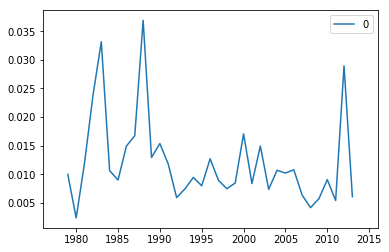

In [41]:
(nb.unigram('bivdit', lang='sme', period=(1970, 2020))/nb.unigram('leat', lang='sme', period=(1970,2020))).plot()

In [49]:
fisk_v_df.head(5).index

Index(['bivdit', 'bivddán', 'bivddát', 'bivdá', 'bivde'], dtype='object')

In [71]:
rein_n_df.index

Index(['N+Sg+Nom', 'N+Sg+Gen', 'N+Sg+Acc', 'N+Sg+Ill', 'N+Sg+Loc', 'N+Sg+Com',
       'N+Pl+Nom', 'N+Pl+Gen', 'N+Pl+Acc', 'N+Pl+Ill',
       ...
       'N+Pl+Com+PxPl3', 'N+Ess+PxSg1', 'N+Ess+PxSg2', 'N+Ess+PxSg3',
       'N+Ess+PxDu1', 'N+Ess+PxDu2', 'N+Ess+PxDu3', 'N+Ess+PxPl1',
       'N+Ess+PxPl2', 'N+Ess+PxPl3'],
      dtype='object', length=121)

In [73]:
distribution(rein_n.values(), tot_sami)

med belegg: 25 uten belegg: 55


,counts
bohccuid,2960
bohccot,2352
bohcco,2336
boazu,2259
bohccos,436
bohccuiguin,423
bohccuin,337
bohccuide,282
bohccui,172
bohccuideaset,101


In [79]:
smør = word_info('vuodja', pos='N')
smør

{'N+Sg+Nom': ['vuodja'],
 'N+Sg+Gen': ['vuoja'],
 'N+Sg+Gen+Allegro': ['vuoja'],
 'N+Sg+Acc': ['vuoja'],
 'N+Sg+Ill': ['vudjii'],
 'N+Sg+Loc': ['vuojas'],
 'N+Sg+Com': ['vuojain'],
 'N+Pl+Nom': ['vuojat'],
 'N+Pl+Gen': ['vuojaid'],
 'N+Pl+Acc': ['vuojaid'],
 'N+Pl+Ill': ['vuojaide'],
 'N+Pl+Loc': ['vuojain'],
 'N+Pl+Com': ['vuojaiguin'],
 'N+Ess': ['vuodjan'],
 'N+Sg+Nom+PxSg1': ['vuodjan'],
 'N+Sg+Nom+PxSg2': ['vuodjat'],
 'N+Sg+Nom+PxDu1': ['vuodjame'],
 'N+Sg+Nom+PxDu2': ['vuodjade'],
 'N+Sg+Nom+PxPl1': ['vuodjamet'],
 'N+Sg+Nom+PxPl2': ['vuodjadet'],
 'N+Sg+Gen+PxSg1': ['vuodjan'],
 'N+Sg+Gen+PxSg2': ['vuojat'],
 'N+Sg+Gen+PxSg3': ['vuojas'],
 'N+Sg+Gen+PxDu1': ['vuodjame'],
 'N+Sg+Gen+PxDu2': ['vuojade'],
 'N+Sg+Gen+PxDu3': ['vuojaska'],
 'N+Sg+Gen+PxPl1': ['vuodjamet'],
 'N+Sg+Gen+PxPl2': ['vuojadet'],
 'N+Sg+Gen+PxPl3': ['vuojaset'],
 'N+Sg+Acc+PxSg1': ['vuodjan'],
 'N+Sg+Acc+PxSg2': ['vuojat'],
 'N+Sg+Acc+PxSg3': ['vuojas'],
 'N+Sg+Acc+PxDu1': ['vuodjame'],
 'N+Sg+Acc+PxDu2': [

In [81]:
smør2 = word_info('gusavuodja', pos='N')
smør2

{'N+Sg+Nom': ['gusavuodja'],
 'N+Sg+Gen': ['gusavuoja'],
 'N+Sg+Gen+Allegro': ['gusavuoja'],
 'N+Sg+Acc': ['gusavuoja'],
 'N+Sg+Ill': ['gusavudjii'],
 'N+Sg+Loc': ['gusavuojas'],
 'N+Sg+Com': ['gusavuojain'],
 'N+Pl+Nom': ['gusavuojat'],
 'N+Pl+Gen': ['gusavuojaid'],
 'N+Pl+Acc': ['gusavuojaid'],
 'N+Pl+Ill': ['gusavuojaide'],
 'N+Pl+Loc': ['gusavuojain'],
 'N+Pl+Com': ['gusavuojaiguin'],
 'N+Ess': ['gusavuodjan'],
 'N+Sg+Nom+PxSg1': ['gusavuodjan'],
 'N+Sg+Nom+PxSg2': ['gusavuodjat'],
 'N+Sg+Nom+PxDu1': ['gusavuodjame'],
 'N+Sg+Nom+PxDu2': ['gusavuodjade'],
 'N+Sg+Nom+PxPl1': ['gusavuodjamet'],
 'N+Sg+Nom+PxPl2': ['gusavuodjadet'],
 'N+Sg+Gen+PxSg1': ['gusavuodjan'],
 'N+Sg+Gen+PxSg2': ['gusavuojat'],
 'N+Sg+Gen+PxSg3': ['gusavuojas'],
 'N+Sg+Gen+PxDu1': ['gusavuodjame'],
 'N+Sg+Gen+PxDu2': ['gusavuojade'],
 'N+Sg+Gen+PxDu3': ['gusavuojaska'],
 'N+Sg+Gen+PxPl1': ['gusavuodjamet'],
 'N+Sg+Gen+PxPl2': ['gusavuojadet'],
 'N+Sg+Gen+PxPl3': ['gusavuojaset'],
 'N+Sg+Acc+PxSg1': ['gusavuodja

In [85]:
fett = word_info('buoidi', pos='N')
fett

{'N+Sg+Nom': ['buoidi'],
 'N+Sg+Gen': ['buoidde', 'buoiddi'],
 'N+Sg+Gen+Allegro': ['buoidde'],
 'N+Sg+Acc': ['buoiddi'],
 'N+Sg+Ill': ['buoidái'],
 'N+Sg+Loc': ['buoiddis'],
 'N+Sg+Com': ['buiddiin'],
 'N+Pl+Nom': ['buoiddit'],
 'N+Pl+Gen': ['buiddiid'],
 'N+Pl+Acc': ['buiddiid'],
 'N+Pl+Ill': ['buiddiide'],
 'N+Pl+Loc': ['buiddiin'],
 'N+Pl+Com': ['buiddiiguin'],
 'N+Ess': ['buoidin'],
 'N+Sg+Nom+PxSg1': ['buoidán'],
 'N+Sg+Nom+PxSg2': ['buoidát'],
 'N+Sg+Nom+PxDu1': ['buoidáme'],
 'N+Sg+Nom+PxDu2': ['buoidáde'],
 'N+Sg+Nom+PxPl1': ['buoidámet'],
 'N+Sg+Nom+PxPl2': ['buoidádet'],
 'N+Sg+Gen+PxSg1': ['buoidán'],
 'N+Sg+Gen+PxSg2': ['buoiddát'],
 'N+Sg+Gen+PxSg3': ['buoiddis'],
 'N+Sg+Gen+PxDu1': ['buoidáme'],
 'N+Sg+Gen+PxDu2': ['buoiddáde'],
 'N+Sg+Gen+PxDu3': ['buoiddiska'],
 'N+Sg+Gen+PxPl1': ['buoidámet'],
 'N+Sg+Gen+PxPl2': ['buoiddádet'],
 'N+Sg+Gen+PxPl3': ['buoiddiset'],
 'N+Sg+Acc+PxSg1': ['buoidán'],
 'N+Sg+Acc+PxSg2': ['buoiddát'],
 'N+Sg+Acc+PxSg3': ['buoiddis'],
 'N+Sg+Ac

In [87]:
fett2 = word_info('sisbuoiddit', pos='N')
fett2

{'N+Sg+Nom': ['sisbuoidi'],
 'N+Sg+Gen': ['sisbuoidde', 'sisbuoiddi'],
 'N+Sg+Gen+Allegro': ['sisbuoidde'],
 'N+Sg+Acc': ['sisbuoiddi'],
 'N+Sg+Ill': ['sisbuoidái'],
 'N+Sg+Loc': ['sisbuoiddis'],
 'N+Sg+Com': ['sisbuiddiin'],
 'N+Pl+Nom': ['sisbuoiddit'],
 'N+Pl+Gen': ['sisbuiddiid'],
 'N+Pl+Acc': ['sisbuiddiid'],
 'N+Pl+Ill': ['sisbuiddiide'],
 'N+Pl+Loc': ['sisbuiddiin'],
 'N+Pl+Com': ['sisbuiddiiguin'],
 'N+Ess': ['sisbuoidin'],
 'N+Sg+Nom+PxSg1': ['sisbuoidán'],
 'N+Sg+Nom+PxSg2': ['sisbuoidát'],
 'N+Sg+Nom+PxDu1': ['sisbuoidáme'],
 'N+Sg+Nom+PxDu2': ['sisbuoidáde'],
 'N+Sg+Nom+PxPl1': ['sisbuoidámet'],
 'N+Sg+Nom+PxPl2': ['sisbuoidádet'],
 'N+Sg+Gen+PxSg1': ['sisbuoidán'],
 'N+Sg+Gen+PxSg2': ['sisbuoiddát'],
 'N+Sg+Gen+PxSg3': ['sisbuoiddis'],
 'N+Sg+Gen+PxDu1': ['sisbuoidáme'],
 'N+Sg+Gen+PxDu2': ['sisbuoiddáde'],
 'N+Sg+Gen+PxDu3': ['sisbuoiddiska'],
 'N+Sg+Gen+PxPl1': ['sisbuoidámet'],
 'N+Sg+Gen+PxPl2': ['sisbuoiddádet'],
 'N+Sg+Gen+PxPl3': ['sisbuoiddiset'],
 'N+Sg+Acc+PxSg1'

In [83]:
distribution(smør2.values(), tot_sami)

med belegg: 6 uten belegg: 76


,counts
gusavuoja,27
gusavuodja,25
gusavuojain,5
gusavuojas,2
gusavuojaid,1
gusavuodjan,1


In [84]:
distribution(smør.values(), tot_sami)

med belegg: 13 uten belegg: 69


,counts
vuoja,393
vuodja,324
vuodjat,210
vuojas,67
vuodjan,59
vuojain,37
vuojaid,20
vudjii,18
vuojat,15
vuodjame,7


In [86]:
distribution(fett.values(), tot_sami)

med belegg: 11 uten belegg: 74


,counts
buoidi,494
buoiddi,184
buoiddit,71
buiddiid,52
buoiddis,32
buoidde,28
buiddiin,22
buoidin,13
buiddiiguin,3
buiddiinis,2


In [88]:
distribution(fett2.values(), tot_sami)

med belegg: 0 uten belegg: 85


,counts


In [89]:
invert(fett)

{'buoidi': ['N+Sg+Nom'],
 'buoidde': ['N+Sg+Gen', 'N+Sg+Gen+Allegro'],
 'buoiddi': ['N+Sg+Gen', 'N+Sg+Acc'],
 'buoidái': ['N+Sg+Ill'],
 'buoiddis': ['N+Sg+Loc', 'N+Sg+Gen+PxSg3', 'N+Sg+Acc+PxSg3'],
 'buiddiin': ['N+Sg+Com', 'N+Pl+Loc'],
 'buoiddit': ['N+Pl+Nom'],
 'buiddiid': ['N+Pl+Gen', 'N+Pl+Acc'],
 'buiddiide': ['N+Pl+Ill'],
 'buiddiiguin': ['N+Pl+Com'],
 'buoidin': ['N+Ess'],
 'buoidán': ['N+Sg+Nom+PxSg1', 'N+Sg+Gen+PxSg1', 'N+Sg+Acc+PxSg1'],
 'buoidát': ['N+Sg+Nom+PxSg2'],
 'buoidáme': ['N+Sg+Nom+PxDu1', 'N+Sg+Gen+PxDu1', 'N+Sg+Acc+PxDu1'],
 'buoidáde': ['N+Sg+Nom+PxDu2'],
 'buoidámet': ['N+Sg+Nom+PxPl1', 'N+Sg+Gen+PxPl1', 'N+Sg+Acc+PxPl1'],
 'buoidádet': ['N+Sg+Nom+PxPl2'],
 'buoiddát': ['N+Sg+Gen+PxSg2', 'N+Sg+Acc+PxSg2'],
 'buoiddáde': ['N+Sg+Gen+PxDu2', 'N+Sg+Acc+PxDu2'],
 'buoiddiska': ['N+Sg+Gen+PxDu3', 'N+Sg+Acc+PxDu3'],
 'buoiddádet': ['N+Sg+Gen+PxPl2', 'N+Sg+Acc+PxPl2'],
 'buoiddiset': ['N+Sg+Gen+PxPl3', 'N+Sg+Acc+PxPl3'],
 'buoidásan': ['N+Sg+Ill+PxSg1'],
 'buoidásat': 

In [90]:
invert(smør)

{'vuodja': ['N+Sg+Nom'],
 'vuoja': ['N+Sg+Gen', 'N+Sg+Gen+Allegro', 'N+Sg+Acc'],
 'vudjii': ['N+Sg+Ill'],
 'vuojas': ['N+Sg+Loc', 'N+Sg+Gen+PxSg3', 'N+Sg+Acc+PxSg3'],
 'vuojain': ['N+Sg+Com', 'N+Pl+Loc'],
 'vuojat': ['N+Pl+Nom', 'N+Sg+Gen+PxSg2', 'N+Sg+Acc+PxSg2'],
 'vuojaid': ['N+Pl+Gen', 'N+Pl+Acc'],
 'vuojaide': ['N+Pl+Ill'],
 'vuojaiguin': ['N+Pl+Com'],
 'vuodjan': ['N+Ess', 'N+Sg+Nom+PxSg1', 'N+Sg+Gen+PxSg1', 'N+Sg+Acc+PxSg1'],
 'vuodjat': ['N+Sg+Nom+PxSg2'],
 'vuodjame': ['N+Sg+Nom+PxDu1', 'N+Sg+Gen+PxDu1', 'N+Sg+Acc+PxDu1'],
 'vuodjade': ['N+Sg+Nom+PxDu2'],
 'vuodjamet': ['N+Sg+Nom+PxPl1', 'N+Sg+Gen+PxPl1', 'N+Sg+Acc+PxPl1'],
 'vuodjadet': ['N+Sg+Nom+PxPl2'],
 'vuojade': ['N+Sg+Gen+PxDu2', 'N+Sg+Acc+PxDu2'],
 'vuojaska': ['N+Sg+Gen+PxDu3', 'N+Sg+Acc+PxDu3'],
 'vuojadet': ['N+Sg+Gen+PxPl2', 'N+Sg+Acc+PxPl2'],
 'vuojaset': ['N+Sg+Gen+PxPl3', 'N+Sg+Acc+PxPl3'],
 'vuodjasan': ['N+Sg+Ill+PxSg1'],
 'vuodjasat': ['N+Sg+Ill+PxSg2'],
 'vuodjasis': ['N+Sg+Ill+PxSg3'],
 'vuodjaseame': ['N+

In [101]:
være = word_info('leat', pos='V')
være

{'V+Inf': ['leat', 'leahkit'],
 'V+Ind+Prs+Sg1': ['lean'],
 'V+Ind+Prs+Sg2': ['leat'],
 'V+Ind+Prs+Sg3': ['lea'],
 'V+Ind+Prs+Du1': ['letne', 'ledne'],
 'V+Ind+Prs+Du2': ['leahppi'],
 'V+Ind+Prs+Du3': ['leaba'],
 'V+Ind+Prs+Pl1': ['leat'],
 'V+Ind+Prs+Pl2': ['lehpet'],
 'V+Ind+Prs+Pl3': ['leat'],
 'V+Ind+Prs+ConNeg': ['leat'],
 'V+Ind+Prt+Sg1': ['ledjen'],
 'V+Ind+Prt+Sg2': ['ledjet'],
 'V+Ind+Prt+Sg3': ['lei', 'leai'],
 'V+Ind+Prt+Du1': ['leimme'],
 'V+Ind+Prt+Du2': ['leidde'],
 'V+Ind+Prt+Du3': ['leaigga', 'leigga'],
 'V+Ind+Prt+Pl1': ['leimmet'],
 'V+Ind+Prt+Pl2': ['leiddet'],
 'V+Ind+Prt+Pl3': ['ledje'],
 'V+Ind+Prt+ConNeg': ['lean'],
 'V+Cond+Prs+Sg1': ['livččen'],
 'V+Cond+Prs+Sg2': ['livččet'],
 'V+Cond+Prs+Sg3': ['livččii'],
 'V+Cond+Prs+Du1': ['livččiime'],
 'V+Cond+Prs+Du2': ['livččiide'],
 'V+Cond+Prs+Du3': ['livččiiga'],
 'V+Cond+Prs+Pl1': ['livččiimet'],
 'V+Cond+Prs+Pl2': ['livččiidet'],
 'V+Cond+Prs+Pl3': ['livčče'],
 'V+Cond+Prs+ConNeg': ['livčče'],
 'V+Imprt+Sg1': ['le

In [102]:
distribution(være.values(), tot_sami)

med belegg: 61 uten belegg: 4


,counts
lea,234100
leat,178337
lei,90658
ledje,34423
lean,30800
leai,13381
ledjen,3890
leigga,3548
leamaš,2964
leaba,2612


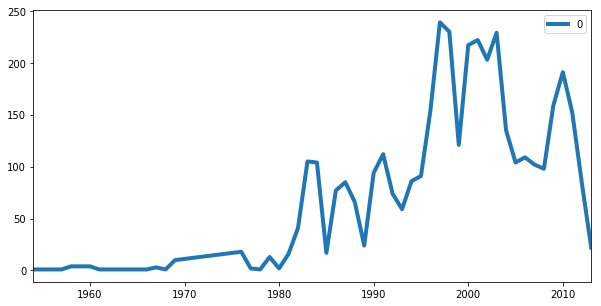

In [64]:
unigram_agg(fisk_v_df.head(10).index).plot(figsize=(10,5), lw=4)

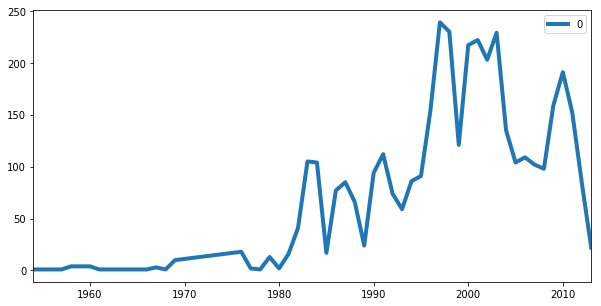

In [64]:
unigram_agg(fisk_v_df.head(10).index).plot(figsize=(10,5), lw=4)

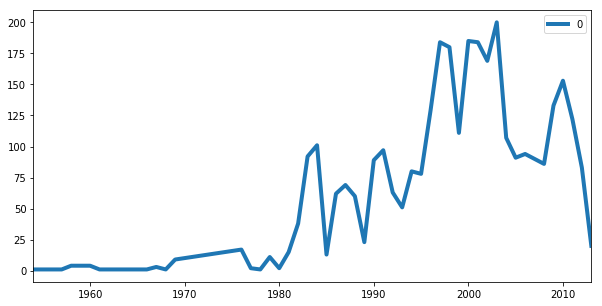

In [65]:
unigram_agg(fisk_v_df.head(5).index).plot(figsize=(10,5), lw=4)

In [54]:
unigram_agg(fisk_v_df.head(5).index)

,0
1958,2.0
1961,1.0
1963,1.0
1966,1.0
1967,1.0
1969,8.0
1976,13.0
1977,2.0
1979,9.0
1980,2.0


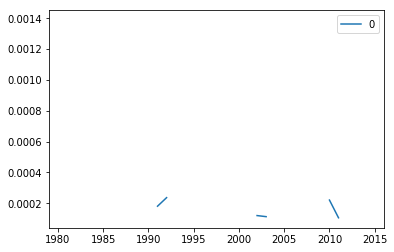

In [42]:
(nb.unigram('muohtaskohtera', lang='sme', period=(1970, 2020))/nb.unigram('leat', lang='sme', period=(1970,2020))).plot()

In [43]:
konk = lambda x, ref_urn: nb.urn_concordance(word=x, urns=nb.refine_book_urn(words=x, urns=ref_urn))

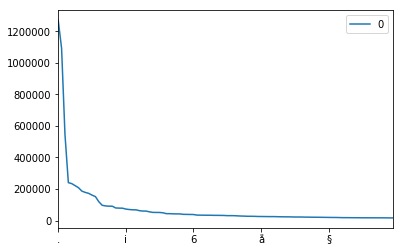

In [44]:
nb.frame(dict(sami_count.most_common(100))).plot()

In [45]:
sami_count['gillii']

1211

In [46]:
len(sami_count.keys())

1442261

In [ ]:
sami = nb.frame(sami_count)
nb.frame_sort(sami)

In [ ]:
konk('bivdit', urn)

In [ ]:
nb.concordance(word='bivdit', subject='fiske', lang='sma', kind='html')

In [ ]:
nb.book_corpus(lang='sma', limit=3000)

In [ ]:
nb.urn_concordance(word='giella', urns=urn[:100])